In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [18]:
df = pd.read_csv("Raisin_Dataset.csv")
df["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [19]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [20]:
# Data Preprocessing for MLP model :

X = df.drop(columns=['Class'])
y = df['Class']

y_encoded = pd.get_dummies(y).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)



In [21]:
# the MLP Model :

def MLP(hidden_units=64, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(y_encoded.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [24]:
# Grid search :

param_grid = {
    'hidden_units': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1]
}

best_accuracy = 0
best_params = {}

# Iterate over all hyperparameter combinations :

for hidden_units in param_grid['hidden_units']:
    for learning_rate in param_grid['learning_rate']:
        print(f"Training with hidden_units={hidden_units} and learning_rate={learning_rate}...")
        
        model = MLP(hidden_units, learning_rate)
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(y_test, axis=1)
        
        accuracy = accuracy_score(y_test_classes, y_pred_classes)
        print(f"Test Accuracy: {accuracy * 100:.2f}%")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'hidden_units': hidden_units, 'learning_rate': learning_rate}

print(f"Best Hyperparameters: {best_params}")

Training with hidden_units=32 and learning_rate=0.001...


C:\Users\R0TP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Test Accuracy: 86.67%
Training with hidden_units=32 and learning_rate=0.01...


C:\Users\R0TP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test Accuracy: 86.67%
Training with hidden_units=32 and learning_rate=0.1...


C:\Users\R0TP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Test Accuracy: 84.44%
Training with hidden_units=64 and learning_rate=0.001...


C:\Users\R0TP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test Accuracy: 86.67%
Training with hidden_units=64 and learning_rate=0.01...


C:\Users\R0TP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test Accuracy: 86.11%
Training with hidden_units=64 and learning_rate=0.1...


C:\Users\R0TP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test Accuracy: 83.89%
Training with hidden_units=128 and learning_rate=0.001...


C:\Users\R0TP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test Accuracy: 85.56%
Training with hidden_units=128 and learning_rate=0.01...


C:\Users\R0TP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test Accuracy: 86.67%
Training with hidden_units=128 and learning_rate=0.1...


C:\Users\R0TP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test Accuracy: 86.11%
Best Hyperparameters: {'hidden_units': 32, 'learning_rate': 0.001}


In [25]:
# Evaluation : 

best_model = MLP(grid_search_result['hidden_units'], grid_search_result['learning_rate'])
best_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=np.unique(y))
print(report)

C:\Users\R0TP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Final Test Accuracy: 86.67%
Confusion Matrix:
[[75 11]
 [13 81]]

Classification Report:
              precision    recall  f1-score   support

       Besni       0.85      0.87      0.86        86
     Kecimen       0.88      0.86      0.87        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



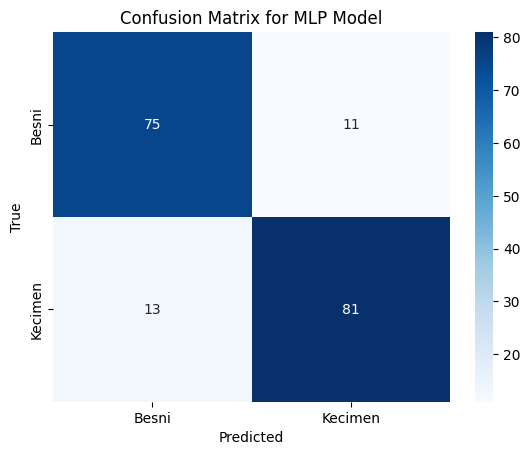

In [26]:
# Results in Tables : 

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MLP Model')
plt.show()


In [ ]:
# SVM :

# Grid search :

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'] 
}


y_train_1d = np.argmax(y_train, axis=1)
y_test_1d = np.argmax(y_test, axis=1)

grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train_1d)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [35]:
# Evaluation :

best_model = grid_search.best_estimator_

y_pred_1d = best_model.predict(X_test)

accuracy = accuracy_score(y_test_1d, y_pred_1d)
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
report = classification_report(y_test_1d, y_pred_1d, target_names=np.unique(y))
print(report)


Final Test Accuracy: 85.00%
Confusion Matrix:
[[70 16]
 [11 83]]

Classification Report:
              precision    recall  f1-score   support

       Besni       0.86      0.81      0.84        86
     Kecimen       0.84      0.88      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



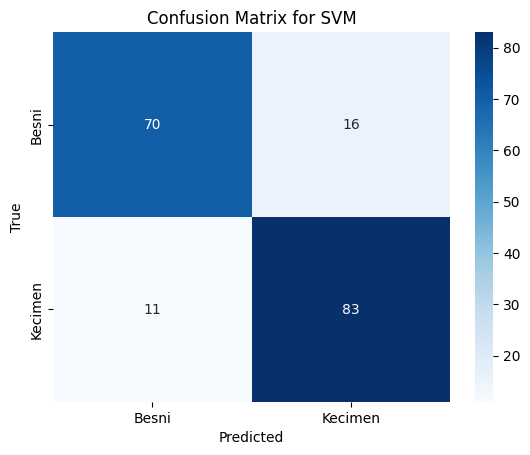

In [38]:
# Results in Tables :

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()

In [40]:
# Random Forest :

# Grid search :

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [41]:
# Evaluation :

best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")


conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))  # Use argmax for multi-class
print("Confusion Matrix:")
print(conf_matrix)


print("\nClassification Report:")
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=np.unique(y))
print(report)

Final Test Accuracy: 86.11%
Confusion Matrix:
[[73 13]
 [12 82]]

Classification Report:
              precision    recall  f1-score   support

       Besni       0.86      0.85      0.85        86
     Kecimen       0.86      0.87      0.87        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



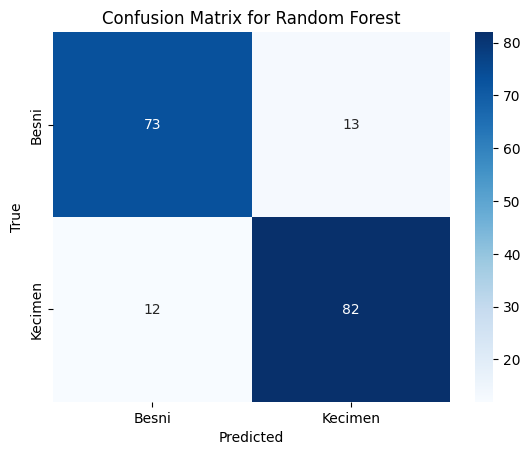

In [42]:
# Results in Tables :

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()